In [21]:
import os
import pandas as pd

# txt 파일이 있는 폴더 경로 지정
folder_path = r'C:\Users\tktk5\Downloads\현금흐름표'
# 폴더 내 모든 txt 파일 이름 리스트 생성
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
# 모든 txt 파일의 전체 경로 생성
연결 = [os.path.join(folder_path, fname) for fname in txt_files if "연결" in fname]
그냥 = [os.path.join(folder_path, fname) for fname in txt_files if "연결" not in fname]

print(연결, 그냥)

['C:\\Users\\tktk5\\Downloads\\현금흐름표\\2015_사업보고서_04_현금흐름표_연결_20230503.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2016_사업보고서_04_현금흐름표_연결_20241115.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2017_사업보고서_04_현금흐름표_연결_20241115.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2018_사업보고서_04_현금흐름표_연결_20250605.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2019_사업보고서_04_현금흐름표_연결_20250605.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2020_사업보고서_04_현금흐름표_연결_20250606.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2021_사업보고서_04_현금흐름표_연결_20250606.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2022_사업보고서_04_현금흐름표_연결_20250606.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2023_사업보고서_04_현금흐름표_연결_20241101.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2024_사업보고서_04_현금흐름표_연결_20250606.txt'] ['C:\\Users\\tktk5\\Downloads\\현금흐름표\\2015_사업보고서_04_현금흐름표_20230503.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2016_사업보고서_04_현금흐름표_20241115.txt', 'C:\\Users\\tktk5\\Downloads\\현금흐름표\\2017_사업보고서_04_현금흐름표_20241115.txt', 'C:\\Users\\tktk5\\Downloads\\현금

In [ ]:
# 각 파일을 DataFrame으로 읽어서 리스트에 저장
dfs_연결 = []

for path in 연결:
    df = pd.read_csv(path, encoding='cp949', delimiter='\t', engine='python')
    dfs_연결.append(df)

# 모든 DataFrame을 하나로 합치기
연결_df = pd.concat(dfs_연결, ignore_index=True)
연결_df.head()

In [ ]:
# 각 파일을 DataFrame으로 읽어서 리스트에 저장
dfs_그냥 = []

for path in 그냥:
    df = pd.read_csv(path, encoding='cp949', delimiter='\t', engine='python')
    dfs_그냥.append(df)

# 모든 DataFrame을 하나로 합치기
그냥_df = pd.concat(dfs_그냥, ignore_index=True)
그냥_df.head()

In [24]:
그냥_df['재무제표종류'].unique()

array(['현금흐름표, 간접법 - 별도재무제표', '현금흐름표, 직접법 - 별도재무제표', '현금흐름표, 직접법 - 별도',
       '현금흐름표, 간접법 - 별도'], dtype=object)

In [26]:
# 'in'을 시리즈에 직접 쓰면 ValueError가 발생하므로 isin()을 사용해야 합니다.
그냥_간접_df = 그냥_df.loc[그냥_df['재무제표종류'].isin(['현금흐름표, 간접법 - 별도재무제표', '현금흐름표, 간접법 - 별도'])]
# 오타 수정: '제무재표종류' → '재무제표종류'
그냥_간접_df['재무제표종류'].unique()

array(['현금흐름표, 간접법 - 별도재무제표', '현금흐름표, 간접법 - 별도'], dtype=object)

In [27]:
그냥_간접_df['재무제표종류'] = '현금흐름표_간접법_별도'
그냥_간접_df['재무제표종류'].unique()

C:\Users\tktk5\AppData\Local\Temp\ipykernel_3080\231157831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  그냥_간접_df['재무제표종류'] = '현금흐름표_간접법_별도'


array(['현금흐름표_간접법_별도'], dtype=object)

In [41]:
그냥_간접_df['업종명'].value_counts()

업종명
특수 목적용 기계 제조업            59016
소프트웨어 개발 및 공급업           55004
전자부품 제조업                 48915
의약품 제조업                  41533
자동차 신품 부품 제조업            39415
                         ...  
소화물 전문 운송업                  31
곡물 가공품, 전분 및 전분제품 제조업       31
교육 지원 서비스업                  30
출판업                         28
건축 자재, 철물 및 난방장치 도매업        26
Name: count, Length: 236, dtype: int64

In [155]:
그냥_간접_12_df = 그냥_간접_df.loc[그냥_간접_df['결산월'] == 12]
그냥_간접_12_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981961 entries, 60 to 1027163
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   재무제표종류       981961 non-null  object 
 1   종목코드         981961 non-null  object 
 2   회사명          981961 non-null  object 
 3   시장구분         981961 non-null  object 
 4   업종           981961 non-null  int64  
 5   업종명          981049 non-null  object 
 6   결산월          981961 non-null  int64  
 7   결산기준일        981961 non-null  object 
 8   보고서종류        981961 non-null  object 
 9   통화           981961 non-null  object 
 10  항목코드         981961 non-null  object 
 11  항목명          981961 non-null  object 
 12  당기           871933 non-null  object 
 13  Unnamed: 13  0 non-null       float64
 14  전기           863646 non-null  object 
 15  전전기          845211 non-null  object 
 16  Unnamed: 16  0 non-null       float64
dtypes: float64(2), int64(2), object(13)
memory usage: 134.9+ MB


In [156]:
그냥_간접_12_df = 그냥_간접_12_df.drop(columns=['Unnamed: 13', 'Unnamed: 16', '전기', '전전기', '결산월','보고서종류','항목코드'])
그냥_간접_12_df.head()

,재무제표종류,종목코드,회사명,시장구분,업종,업종명,결산기준일,통화,항목명,당기
60,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,영업활동현금흐름,"-37,050,953,747"
61,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,영업에서 창출된 현금흐름,"-22,344,475,417"
62,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,이자의 수취,"371,845,526"
63,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,이자의 지급,"12,243,585,181"
64,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,배당의 수취,"33,600,000"


In [157]:
그냥_간접_12_df['당기'] = (
    그냥_간접_12_df['당기']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('', None)
    .astype(float)
)

In [158]:
그냥_간접_12_df['업종'] = 그냥_간접_12_df['업종'].astype(str)
그냥_간접_12_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981961 entries, 60 to 1027163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   재무제표종류  981961 non-null  object 
 1   종목코드    981961 non-null  object 
 2   회사명     981961 non-null  object 
 3   시장구분    981961 non-null  object 
 4   업종      981961 non-null  object 
 5   업종명     981049 non-null  object 
 6   결산기준일   981961 non-null  object 
 7   통화      981961 non-null  object 
 8   항목명     981961 non-null  object 
 9   당기      871933 non-null  float64
dtypes: float64(1), object(9)
memory usage: 82.4+ MB


In [159]:
그냥_간접_12_df['항목명'] = 그냥_간접_12_df['항목명'].str.strip()
그냥_간접_12_df['항목명'] = 그냥_간접_12_df['항목명'].str.replace(" ","")
그냥_간접_12_df['항목명'].unique()

array(['영업활동현금흐름', '영업에서창출된현금흐름', '이자의수취', ..., '기타유동자산의감소(증가）',
       '금융보증수익(수수료수입)', '종속기업투자주식배당금수익'], shape=(17852,), dtype=object)

In [160]:
그냥_간접_12_df.reset_index(inplace=True,drop=True)
그냥_간접_12_df.to_csv("../data/raw/현금흐름표_간접법_별도_12월.csv",encoding="utf-8-sig")

In [161]:
len(그냥_간접_12_df['항목명'].unique())

17852

In [162]:
processed = 그냥_간접_12_df.copy()

In [214]:
lista = processed['항목명'].unique()
lista = sorted(processed['항목명'].unique())
lista

['',
 '(감자)단주대금지급',
 '(비유동)공정가치금융자산처분',
 '(비유동)공정가치금융자산취득',
 '(비유동)기타금융자산의증가',
 '(비유동)기타부채의증가',
 '(비유동)기타포괄손익-공정가치금융자산취득',
 '(비유동)당기손익-공정가치금융자산처분',
 '(비유동)당기손익-공정가치금융자산취득',
 '(비유동)당기손익-공정가치측정금융자산의감소',
 '(비유동)당기손익-공정가치측정금융자산의증가',
 '(비유동)당기손익-공정가치측정금융자산의처분',
 '(비유동)당기손익-공정가치측정금융자산의취득',
 '(유동)공정가치금융자산처분',
 '(유동)공정가치금융자산취득',
 '(유동)기타금융자산의감소',
 '(유동)기타금융자산의순증감',
 '(유동)기타부채의증가',
 '(유동)기타채권의감소',
 '(유동)기타채권의증가',
 '(유동)기타포괄손익-공정가치금융자산처분',
 '(유동)기타포괄손익-공정가치금융자산취득',
 '(유동)당기손익-공정가치금융자산처분',
 '(유동)당기손익-공정가치금융자산취득',
 '(유동)당기손익-공정가치측정금융자산의감소',
 '(유동)당기손익-공정가치측정금융자산의증가',
 '(유동)당기손익-공정가치측정금융자산의처분',
 '(유동)당기손익-공정가치측정금융자산의취득',
 '(유동)리스부채의감소',
 '(유동성)금융리스부채의감소',
 '(유동성)리스부채의상환',
 '(유동성)장기대여금의회수',
 '(유동성)장기미지급금의감소',
 '(유동성)장기부채의상환',
 '(유동성)장기차입금상환',
 '(유동성)장기차입금의상환',
 '(유동성)전환사채의감소',
 '(장기)보증금의감소',
 '(장기)선급비용의감소',
 '(정부보조금)',
 '(투자)선급금의증가',
 '(현물출자에의한)유상증자',
 '-',
 '-당기순손실',
 '-당기순이익',
 '-영업활동으로인한자산부채의변동',
 '-조정',
 '.기말현금및현금성자산',
 '.현금및현금성자산의증가',
 '.현금및현금성자산의증가(++)',
 'A/S비',
 'A/S비용',
 'A/S수리비',
 'AS비용',


In [215]:
[item for item in lista if "현금및현금성자산의증가" in item]

['.현금및현금성자산의증가',
 '.현금및현금성자산의증가(++)',
 '사업결합으로인한현금및현금성자산의증가',
 '연결실체변동으로인한현금및현금성자산의증가',
 '종속회사합병으로인한현금및현금성자산의증가',
 '합병에따른현금및현금성자산의증가',
 '합병에의한현금및현금성자산의증가',
 '합병으로인한현금및현금성자산의증가',
 '현금및현금성자산의증가',
 '현금및현금성자산의증가(++)',
 '현금및현금성자산의증가(+++)',
 '현금및현금성자산의증가(++++)',
 '현금및현금성자산의증가(Ⅰ+Ⅱ+Ⅲ)',
 '현금및현금성자산의증가(Ⅰ+Ⅱ+Ⅲ+)',
 '현금및현금성자산의증가(Ⅰ＋Ⅱ＋Ⅲ)',
 '현금및현금성자산의증가(깜소)',
 '현금및현금성자산의증가1',
 '현금및현금성자산의증가및감소',
 '현금및현금성자산의증가중단영업',
 '현금및현금성자산의증가（감소）',
 '환율변동으로인한현금및현금성자산의증가',
 '환율변동효과반영전현금및현금성자산의증가',
 '환율변동효과전현금및현금성자산의증가']

In [ ]:
for i in ['Vl','V','X.','ll','l','⑶','⑵','⑴']:
    print(i)
    print(len(processed['항목명'].unique()))
    processed['항목명'] = processed['항목명'].str.replace(f'{i}', '')
    print(len(processed['항목명'].unique()))

In [216]:
print(len(processed['항목명'].unique()))
processed['항목명'] = processed['항목명'].str.replace(r'^\.', '', regex=True)
print(len(processed['항목명'].unique()))

15592
15589


In [ ]:
for i in ['가','나','다','라','마','바','사','아','자','차','카','타','파','하']:
    print(i)
    print(len(processed['항목명'].unique()))
    processed['항목명'] = processed['항목명'].str.replace(f'{i}.', '')
    print(len(processed['항목명'].unique()))

In [ ]:
processed.reset_index(inplace=True,drop=True)
processed.to_csv("../data/raw/현금흐름표_간접법_별도_12월.csv",encoding="utf-8-sig")

: 

In [1]:
import pandas as pd
processed2 = pd.read_csv("C:/Users/tktk5/Downloads/현금흐름표_간접법_별도_12월.csv")
processed2.head()

,Unnamed: 0,재무제표종류,종목코드,회사명,시장구분,업종,업종명,결산기준일,통화,항목명,당기
0,0,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,영업활동현금흐름,-3.705095e+10
1,1,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,영업에서창출된현금흐름,-2.234448e+10
2,2,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,이자의수취,3.718455e+08
3,3,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,이자의지급,1.224359e+10
4,4,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,배당의수취,3.360000e+07


In [6]:
lista = sorted(processed2['항목명'].dropna().astype(str).unique())
lista

['(감자)단주대금지급',
 '(비유동)공정가치금융자산처분',
 '(비유동)공정가치금융자산취득',
 '(비유동)기타금융자산의증가',
 '(비유동)기타부채의증가',
 '(비유동)기타포괄손익-공정가치금융자산취득',
 '(비유동)당기손익-공정가치금융자산처분',
 '(비유동)당기손익-공정가치금융자산취득',
 '(비유동)당기손익-공정가치측정금융자산의감소',
 '(비유동)당기손익-공정가치측정금융자산의증가',
 '(비유동)당기손익-공정가치측정금융자산의처분',
 '(비유동)당기손익-공정가치측정금융자산의취득',
 '(유동)공정가치금융자산처분',
 '(유동)공정가치금융자산취득',
 '(유동)기타금융자산의감소',
 '(유동)기타금융자산의순증감',
 '(유동)기타부채의증가',
 '(유동)기타채권의감소',
 '(유동)기타채권의증가',
 '(유동)기타포괄손익-공정가치금융자산처분',
 '(유동)기타포괄손익-공정가치금융자산취득',
 '(유동)당기손익-공정가치금융자산처분',
 '(유동)당기손익-공정가치금융자산취득',
 '(유동)당기손익-공정가치측정금융자산의감소',
 '(유동)당기손익-공정가치측정금융자산의증가',
 '(유동)당기손익-공정가치측정금융자산의처분',
 '(유동)당기손익-공정가치측정금융자산의취득',
 '(유동)리스부채의감소',
 '(유동성)금융리스부채의감소',
 '(유동성)리스부채의상환',
 '(유동성)장기대여금의회수',
 '(유동성)장기미지급금의감소',
 '(유동성)장기부채의상환',
 '(유동성)장기차입금상환',
 '(유동성)장기차입금의상환',
 '(유동성)전환사채의감소',
 '(장기)보증금의감소',
 '(장기)선급비용의감소',
 '(정부보조금)',
 '(투자)선급금의증가',
 '(현물출자에의한)유상증자',
 '-',
 '-당기순손실',
 '-당기순이익',
 '-영업활동으로인한자산부채의변동',
 '-조정',
 'A/S비',
 'A/S비용',
 'A/S수리비',
 'AS비용',
 'AS충당부채의증가',
 'CPS부채의증가',
 'FOC금융자산의처분',
 'K-FRS1109호최초적용에

In [11]:
[item for item in lista if "투자활동" in item]

['관계기업으로부터의배당금수취투자활동',
 '금융상품의처분또는만기회수투자활동',
 '금융상품의취득투자활동',
 '기타의투자활동유입',
 '기타의투자활동으로인한현금유출',
 '기타의투자활동현금유입',
 '기타의투자활동현금유출',
 '기타의투자활동현금유출입',
 '기타채권의감소-투자활동',
 '기타채권의증가-투자활동',
 '기타투자활동관련자산의감소',
 '기타투자활동관련자산의증가',
 '기타투자활동관련현금유입액',
 '기타투자활동관련현금유출액',
 '기타투자활동등으로인한현금유출입액',
 '기타투자활동유입',
 '기타투자활동으로부터의현금유출',
 '기타투자활동으로부터의현금흐름',
 '기타투자활동으로인한유입(유출)',
 '기타투자활동으로인한증감',
 '기타투자활동으로인한현금유입',
 '기타투자활동으로인한현금유입(유출)',
 '기타투자활동으로인한현금유입액',
 '기타투자활동으로인한현금유입액(유출액)',
 '기타투자활동으로인한현금유출',
 '기타투자활동으로인한현금유출액',
 '기타투자활동으로인한현금유출입',
 '기타투자활동으로인한현금유출입액',
 '기타투자활동으로인한현금흐름',
 '기타투자활동의유출',
 '기타투자활동의증감',
 '기타투자활동현금유입',
 '기타투자활동현금유출',
 '기타투자활동현금유출액',
 '기타투자활동현금흐름',
 '당기손익-공정가치금융상품의취득-투자활동',
 '당기손익-공정가치금융자산의처분-투자활동',
 '당기손익-공정가치금융자산의취득-투자활동',
 '당기손익인식공정가치측정금융자산(유동)의증가-투자활동',
 '배당금수취투자활동',
 '분할합병으로인한투자활동현금유입액',
 '사용권자산의취득투자활동현금흐름',
 '상각후원가측정금융자산의처분-투자활동',
 '상각후원가측정금융자산의취득-투자활동',
 '선물계약선도계약옵션계약스왑계약에따른현금수취투자활동',
 '선물계약선도계약옵션계약스왑계약에따른현금지급투자활동',
 '인테리어의취득투자활동현금흐름',
 '잡손실(투자활동)',
 '전기투자활동대금의회수',
 '전기투자활동의당기지급',
 '정부보조금의상환투자활동',

In [89]:
cols = [col for col in processed2['항목명'].dropna().unique() if col.startswith('투자') and col.endswith('현금흐름')] #  and col.endswith('현금흐름')
print(cols)

['투자활동현금흐름', '투자활동순현금흐름', '투자활동으로분류된종속기업과기타사업의지배력획득에따른현금흐름']


In [85]:
cols = [col for col in processed2['항목명'].dropna().unique() if '투자활동' in col]
print(cols)

['투자활동현금흐름', '투자활동으로인한현금유입액', '투자활동으로인한현금유출액', '기타의투자활동현금유입', '기타의투자활동현금유출', '기타투자활동으로인한현금유출액', '투자활동현금흐름의유입', '투자활동현금흐름의유출', '기타투자활동으로인한현금유입액', '기타의투자활동으로인한현금유출', '투자활동현금유입', '투자활동현금유출', '투자활동으로인한현금유입', '투자활동으로인한현금유출', '기타투자활동으로인한현금유출입액', '투자활동순현금흐름', '기타투자활동현금유입', '기타투자활동현금유출', '투자활동으로인한유입액', '투자활동으로인한유출액', '기타투자활동현금흐름', '투자활동으로인한현급유입액', '투자활동에의한현금유입액', '투자활동에의한현금유출액', '기타투자활동으로인한현금유출', '잡손실(투자활동)', '투자활동순현금흐름합계', '투자활동현금유입액', '투자활동현금유출액', '투자활동으로인하현금유출액', '기타투자활동으로인한현금유입(유출)', '투자활동현금흐름유입액', '투자활동현금흐름유출액', '기타투자활동의증감', '투자활동에따른미지급금의감소', '기타투자활동으로인한증감', '투자활동현금흐름1', '투자활동에서의순현금유출', '투자활동순현금유출', '투자활동으로인핸현금유출액', '투자활동에서의순현금유입', '투자활동', '중단영업의투자활동현금흐름', '중단영업의투자활동으로인한현금유입액', '투자활동으로인한현금의유입액', '투자활동으로인한현금의유출액', '투자활동의로인한현금의유출액', '기타투자활동으로인한현금유입', '투자활동현금흐름이나재무활동현금흐름으로분류되는기타모든항목', '투자활동으로인한현금의유입', '투자활동으로인한현금의유출', '투자활동미지급금지급', '투자활동으로이한현금유출', '투자활동순현금유입(유출)', '투자활동에인한현금유입', '투자활동순현금흐름유출', '기타투자활동등으로인한현금유출입액', '투자활동으로인한현금유츌액', '투자활동으로인한현급유입', '기타투자활동현금유출액', '중단영업의투자활동으로인한현금유입(유출)액', '기타투

In [88]:
print(len(processed2['항목명'].dropna().unique()))
processed2['항목명'] = processed2['항목명'].str.replace('투자황동으로인한현금흐름','투자활동순현금흐름', regex=False)
print(len(processed2['항목명'].dropna().unique()))

15537
15536


In [78]:
filtered = processed2[processed2['항목명'].isin(['영업활동현금흐름','투자활동현금흐름','재무활동현금흐름','기말의현금', '기초의현금'])]
filtered.reset_index(inplace=True,drop=True)
filtered.drop(['Unnamed: 0'],axis=1)

,재무제표종류,종목코드,회사명,시장구분,업종,업종명,결산기준일,통화,항목명,당기
0,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,영업활동현금흐름,-3.705095e+10
1,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,투자활동현금흐름,-3.535143e+10
2,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,재무활동현금흐름,1.018183e+11
3,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,기초의현금,7.043224e+09
4,현금흐름표_간접법_별도,[095570],AJ네트웍스,유가증권시장상장법인,693,산업용 기계 및 장비 임대업,2015-12-31,KRW,기말의현금,3.645912e+10
...,...,...,...,...,...,...,...,...,...,...
104686,현금흐름표_간접법_별도,[037440],희림,코스닥시장상장법인,721,"건축 기술, 엔지니어링 및 관련 기술 서비스업",2024-12-31,KRW,기초의현금,3.392572e+10
104687,현금흐름표_간접법_별도,[037440],희림,코스닥시장상장법인,721,"건축 기술, 엔지니어링 및 관련 기술 서비스업",2024-12-31,KRW,기말의현금,4.545353e+10
104688,현금흐름표_간접법_별도,[037440],희림,코스닥시장상장법인,721,"건축 기술, 엔지니어링 및 관련 기술 서비스업",2024-12-31,KRW,재무활동현금흐름,-6.384481e+09
104689,현금흐름표_간접법_별도,[037440],희림,코스닥시장상장법인,721,"건축 기술, 엔지니어링 및 관련 기술 서비스업",2024-12-31,KRW,투자활동현금흐름,-2.520424e+09


In [82]:
# '항목명'을 컬럼으로 펼치고, '당기' 값을 값으로 하는 wide-form DataFrame 생성
pivot_df = filtered.pivot_table(
    index=['재무제표종류','종목코드', '회사명', '시장구분', '업종', '업종명', '통화','결산기준일'],
    columns='항목명',
    values='당기',
    aggfunc='first'
).reset_index()

pivot_df.head()

항목명,재무제표종류,종목코드,회사명,시장구분,업종,업종명,통화,결산기준일,기말의현금,기초의현금,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름
0,현금흐름표_간접법_별도,[000020],동화약품,유가증권시장상장법인,212,의약품 제조업,KRW,2015-12-31,4.488938e+10,3.262318e+10,1.983311e+10,-6.588907e+09,-9.797323e+08
1,현금흐름표_간접법_별도,[000020],동화약품,유가증권시장상장법인,212,의약품 제조업,KRW,2016-12-31,3.573038e+10,4.488938e+10,2.548219e+10,-4.213178e+09,-3.042896e+10
2,현금흐름표_간접법_별도,[000020],동화약품,유가증권시장상장법인,212,의약품 제조업,KRW,2017-12-31,3.158817e+10,3.573038e+10,-1.651997e+10,-3.919633e+09,1.631003e+10
3,현금흐름표_간접법_별도,[000020],동화약품,유가증권시장상장법인,212,의약품 제조업,KRW,2018-12-31,3.972989e+10,3.158817e+10,-2.347075e+08,-4.141160e+09,1.251739e+10
4,현금흐름표_간접법_별도,[000020],동화약품,유가증권시장상장법인,212,의약품 제조업,KRW,2019-12-31,3.772988e+10,3.972989e+10,1.412029e+10,-4.937574e+09,-1.117845e+10


In [83]:
pivot_df.describe()

항목명,업종,기말의현금,기초의현금,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름
count,21036.000000,2.069300e+04,2.099300e+04,2.073800e+04,2.062000e+04,2.080100e+04
mean,361.883295,3.229523e+11,5.355258e+11,-8.959271e+10,2.571579e+11,-3.831158e+11
std,182.893117,3.229884e+13,6.269652e+13,1.972748e+13,3.670968e+13,6.614778e+13
min,11.000000,-5.138344e+09,-5.534048e+09,-2.776310e+15,-2.388505e+13,-9.175036e+15
25%,239.000000,3.586911e+09,3.310599e+09,-1.097240e+09,-6.259026e+09,-2.219114e+10
50%,289.000000,9.989114e+09,9.211682e+09,4.720320e+09,-4.288056e+08,-6.238469e+09
75%,479.000000,2.746802e+10,2.576538e+10,1.950340e+10,9.305819e+09,-1.085444e+08
max,969.000000,4.510632e+15,9.002407e+15,5.249150e+13,5.270502e+15,2.611218e+15


In [84]:
pivot_df.isna().sum()

항목명
재무제표종류        0
종목코드          0
회사명           0
시장구분          0
업종            0
업종명           0
통화            0
결산기준일         0
기말의현금       343
기초의현금        43
영업활동현금흐름    298
재무활동현금흐름    416
투자활동현금흐름    235
dtype: int64

In [90]:
processed2.reset_index(inplace=True,drop=True)
processed2.to_csv("C:/Users/tktk5/Downloads/현금흐름표_간접법_별도_12월_2.csv",encoding="utf-8-sig")

In [91]:
pivot_df.to_csv("../data/processed/현금흐름표_간접법_별도_12월.csv",encoding="utf-8-sig")

In [96]:
len(pivot_df['회사명'].drop_duplicates())

3653

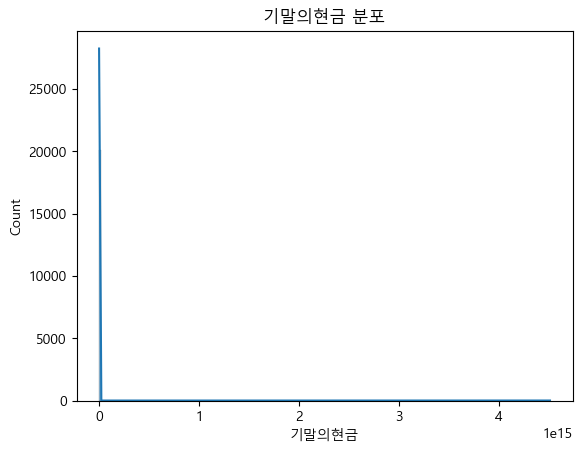

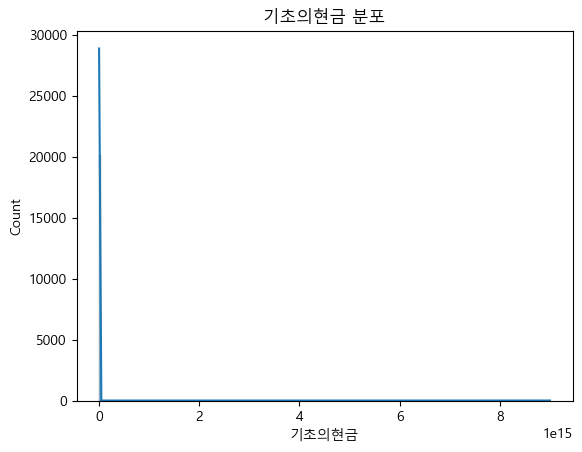

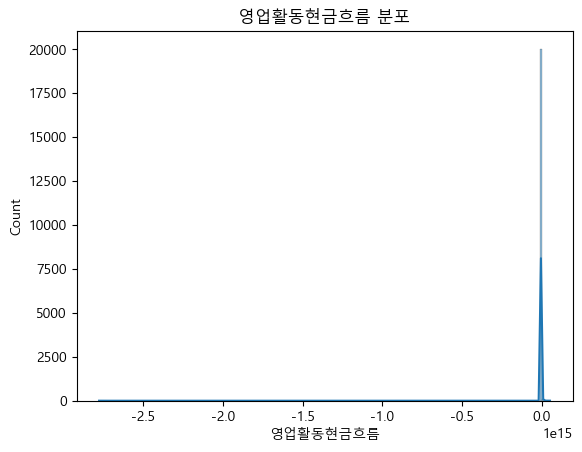

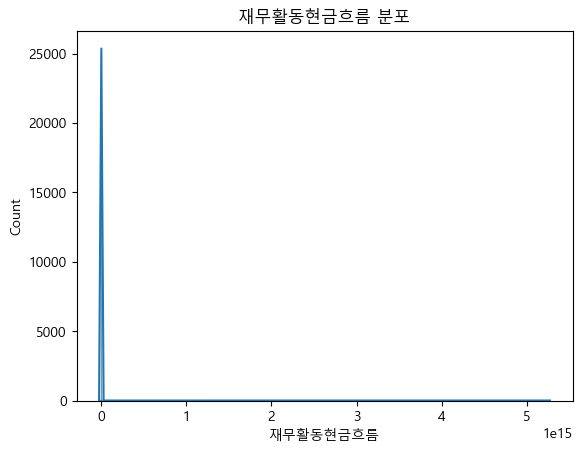

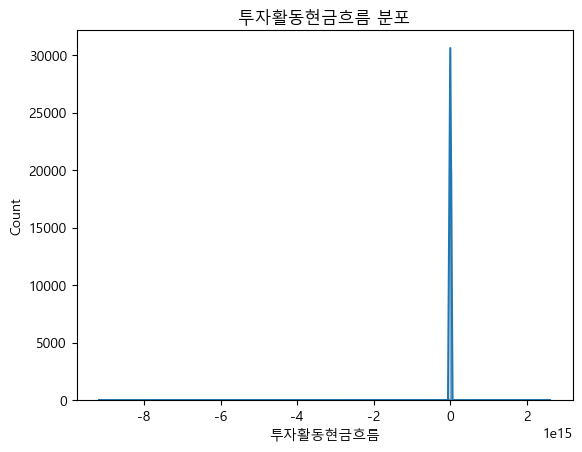

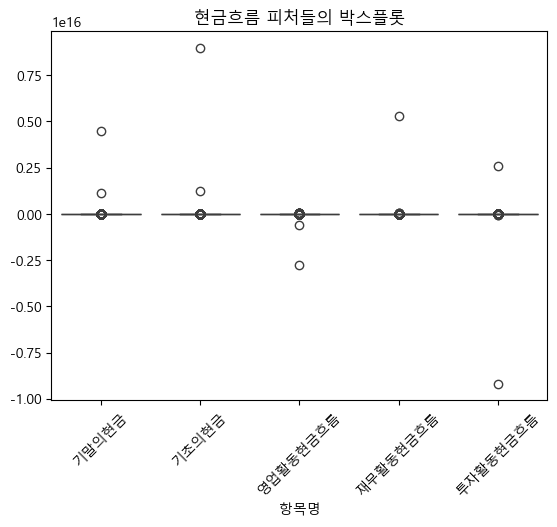

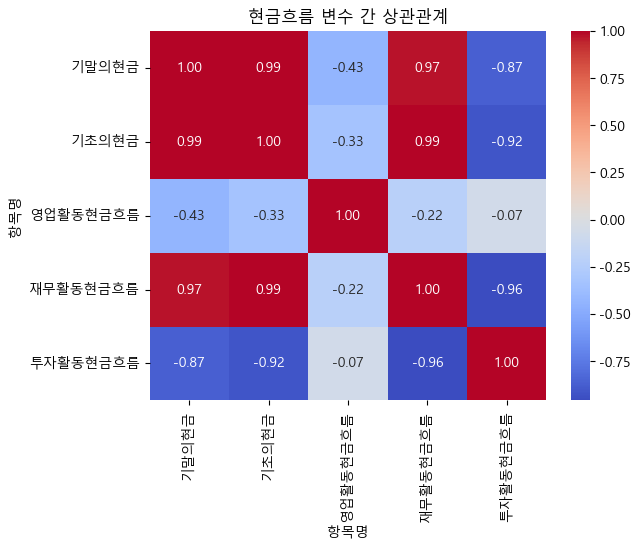

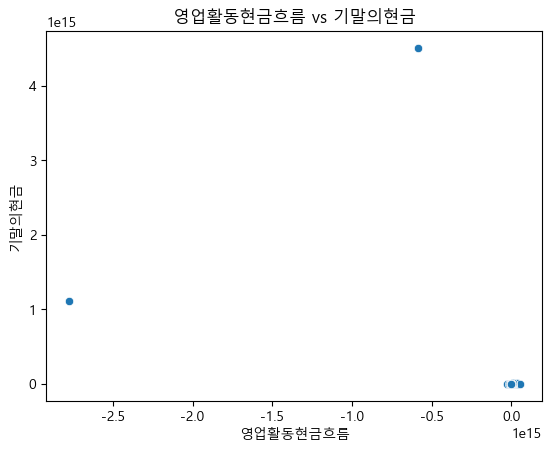

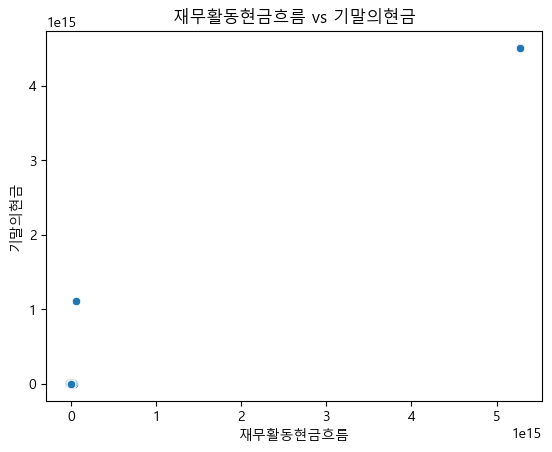

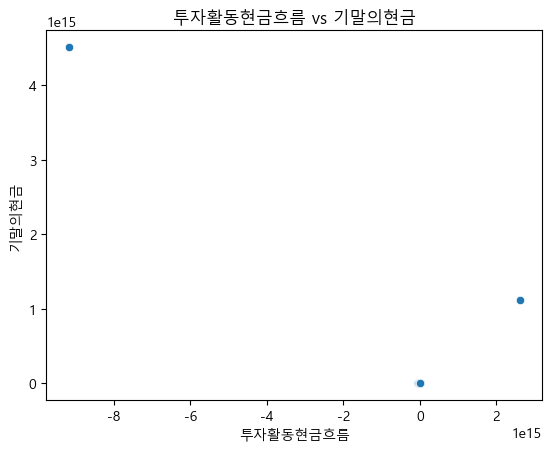

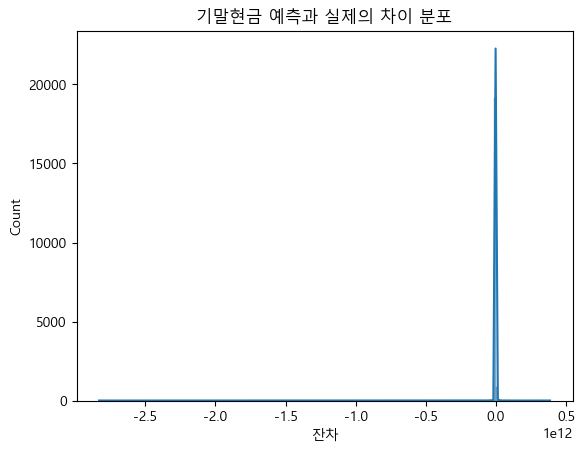

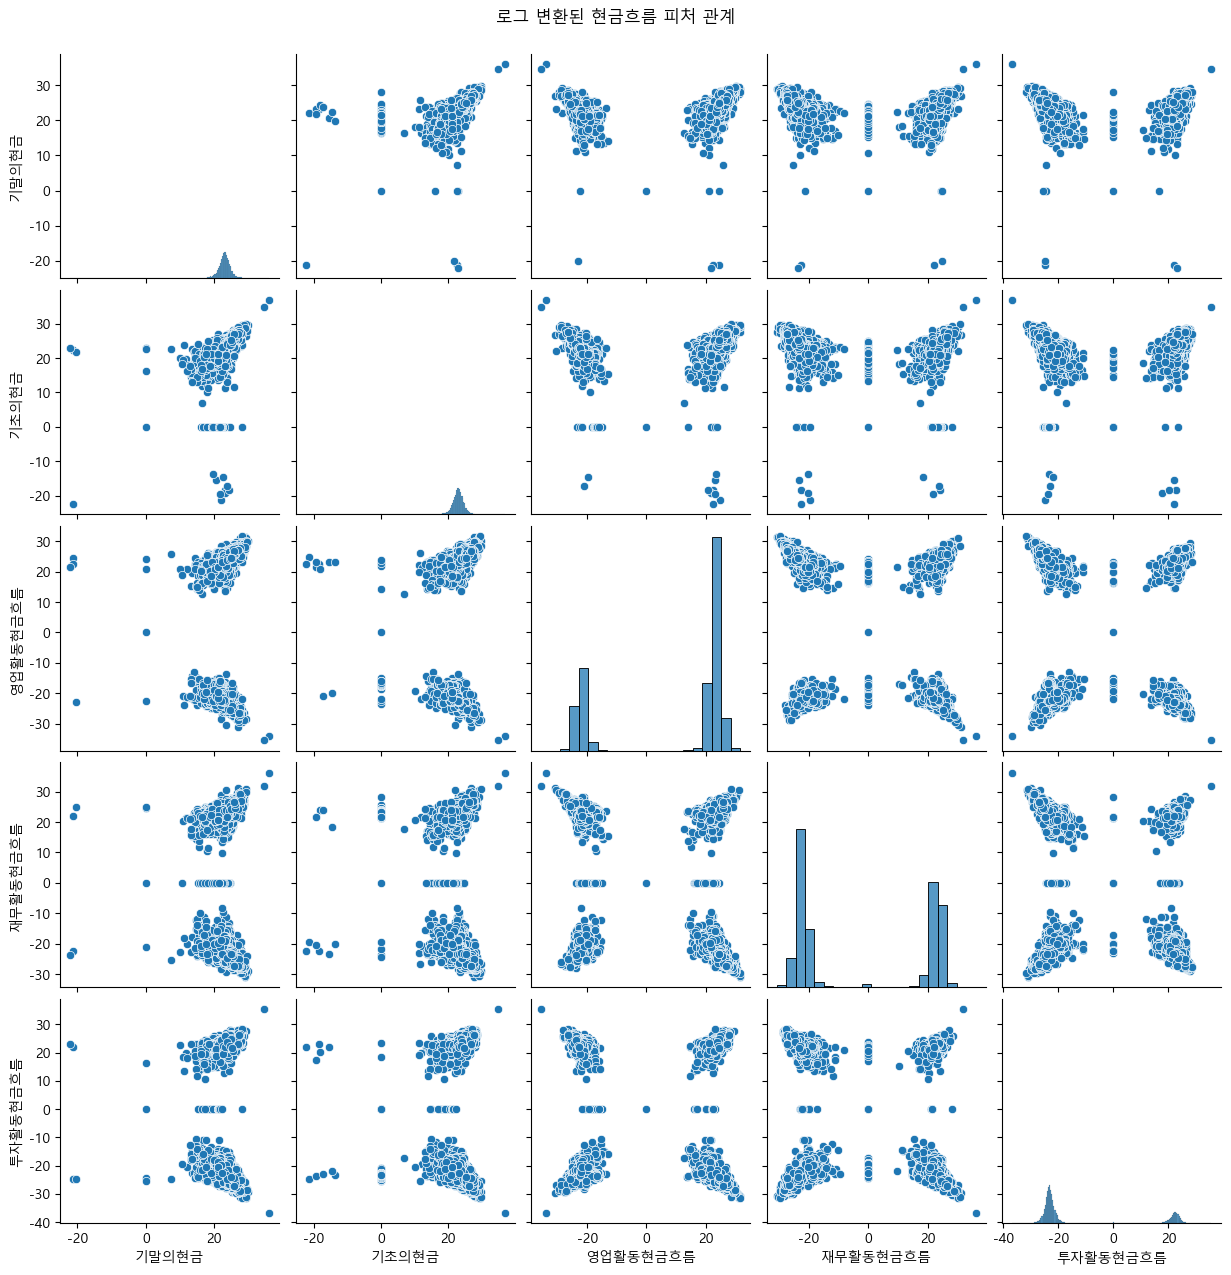

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 결측치가 있는 행은 제외
plot_df = pivot_df[['기말의현금', '기초의현금', '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름']].dropna()

features = ['기말의현금', '기초의현금', '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름']

# 1. 분포 확인
for col in features:
    sns.histplot(plot_df[col], kde=True)
    plt.title(f"{col} 분포")
    plt.show()

# 2. 박스플롯
sns.boxplot(data=plot_df[features])
plt.title("현금흐름 피처들의 박스플롯")
plt.xticks(rotation=45)
plt.show()

# 3. 상관관계 히트맵
corr = plot_df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("현금흐름 변수 간 상관관계")
plt.show()

# 4. 산점도
for col in ['영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름']:
    sns.scatterplot(x=plot_df[col], y=plot_df['기말의현금'])
    plt.title(f"{col} vs 기말의현금")
    plt.show()

# 5. 회계식 검증
plot_df['예측기말현금'] = (
    plot_df['기초의현금'] +
    plot_df['영업활동현금흐름'] +
    plot_df['재무활동현금흐름'] +
    plot_df['투자활동현금흐름']
)
plot_df['잔차'] = plot_df['기말의현금'] - plot_df['예측기말현금']
sns.histplot(plot_df['잔차'], kde=True)
plt.title("기말현금 예측과 실제의 차이 분포")
plt.show()

# 6. 로그 변환 후 pairplot
plot_df_log = plot_df[features].apply(lambda x: np.log1p(np.abs(x)) * np.sign(x))
sns.pairplot(plot_df_log)
plt.suptitle("로그 변환된 현금흐름 피처 관계", y=1.02)
plt.show()


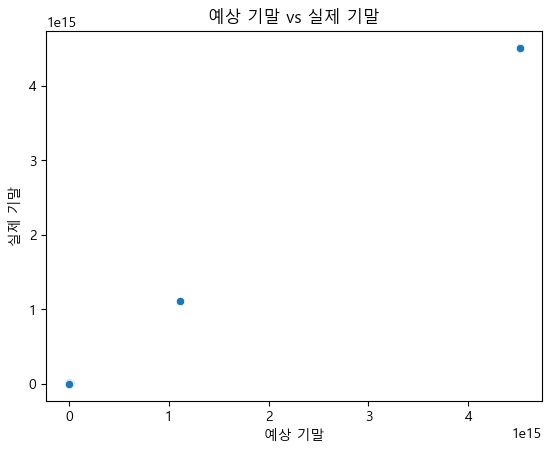

In [106]:
plot_df['예상기말'] = (
    plot_df['기초의현금'] +
    plot_df['영업활동현금흐름'] +
    plot_df['재무활동현금흐름'] +
    plot_df['투자활동현금흐름']
)
sns.scatterplot(x=plot_df['예상기말'], y=plot_df['기말의현금'])
plt.plot([-1000, 1000], [-1000, 1000], color='red', linestyle='--')
plt.title("예상 기말 vs 실제 기말")
plt.xlabel("예상 기말")
plt.ylabel("실제 기말")
plt.show()

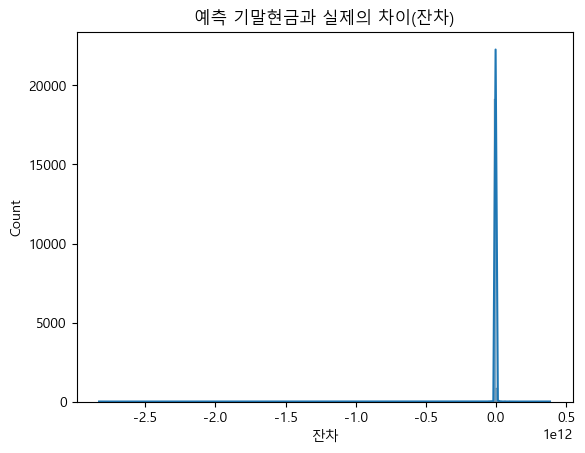

In [107]:
plot_df['잔차'] = plot_df['기말의현금'] - plot_df['예상기말']
sns.histplot(plot_df['잔차'], kde=True)
plt.title("예측 기말현금과 실제의 차이(잔차)")
plt.show()

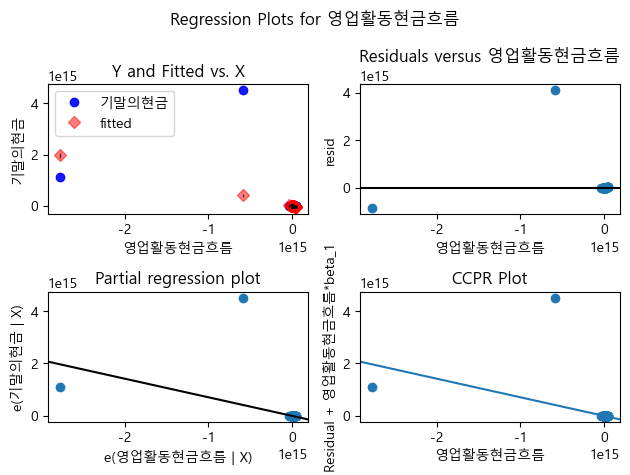

In [109]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = plot_df[['영업활동현금흐름']]
X = sm.add_constant(X)
y = plot_df['기말의현금']

model = sm.OLS(y, X).fit()
sm.graphics.plot_regress_exog(model, '영업활동현금흐름')
plt.tight_layout()
plt.show()